In [1]:
!pip install geopandas pandas openpyxl matplotlib

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# Assuming NSSO file is saved in Downloads
nsso_data = pd.read_excel("~/Downloads/NSSO68.xlsx")

In [5]:
karnataka_data = nsso_data[nsso_data['state'] == 29].copy()

In [6]:
karnataka_data.dropna(subset=['District'], inplace=True)

In [7]:
district_consumption = karnataka_data.groupby('District').agg(avg_milk=('milk_q', 'mean')).reset_index()

In [8]:
geo_path = "~/Downloads/KARNATAKA_DISTRICTS.geojson"  # update if different
karnataka_geo = gpd.read_file(geo_path)

In [9]:
print(karnataka_geo.columns)

Index(['dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat', 'Shape_Length',
       'Shape_Area', 'OBJECTID', 'test', 'Dist_LGD', 'State_LGD', 'geometry'],
      dtype='object')


In [12]:
# Step 1: Convert merge keys to string
karnataka_geo['dtname'] = karnataka_geo['dtname'].astype(str).str.strip().str.lower()
district_consumption['District'] = district_consumption['District'].astype(str).str.strip().str.lower()

In [13]:
# Step 2: Merge after conversion
karnataka_geo = karnataka_geo.merge(
    district_consumption,
    left_on='dtname',
    right_on='District',
    how='left'
)

In [14]:
karnataka_geo = karnataka_geo.merge(district_consumption, left_on='dtname', right_on='District', how='left')

In [16]:
print(karnataka_geo.columns)

Index(['dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat', 'Shape_Length',
       'Shape_Area', 'OBJECTID', 'test', 'Dist_LGD', 'State_LGD', 'geometry',
       'District_x', 'avg_milk_x', 'District_y', 'avg_milk_y'],
      dtype='object')


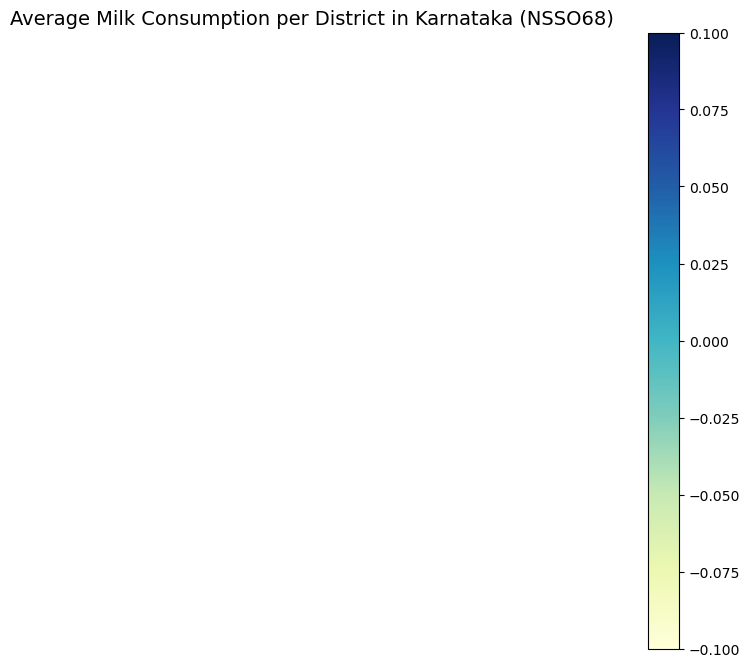

In [20]:
# Plotting the map with correct column name
fig, ax = plt.subplots(figsize=(10, 8))
karnataka_geo.plot(
    column='avg_milk_x',  # or 'avg_milk_x' depending on which one has valid data
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)
ax.set_title('Average Milk Consumption per District in Karnataka (NSSO68)', fontsize=14)
ax.axis('off')
plt.show()

In [22]:
print(karnataka_geo.shape)
print(karnataka_geo[['dtname', 'avg_milk_y','avg_milk_x']].head())

(30, 16)
       dtname  avg_milk_y  avg_milk_x
0       bidar         NaN         NaN
1  kalaburagi         NaN         NaN
2    belagavi         NaN         NaN
3      yadgir         NaN         NaN
4   bagalkote         NaN         NaN


In [23]:
print("Districts in shapefile (geo):")
print(sorted(karnataka_geo['dtname'].unique()))

print("\nDistricts in NSSO data:")
print(sorted(district_consumption['District'].unique()))

Districts in shapefile (geo):
['bagalkote', 'ballari', 'bangalore', 'belagavi', 'bengaluru rural', 'bidar', 'chamarajanagara', 'chikkaballapura', 'chikkamagaluru', 'chitradurga', 'dakshina kannada', 'davanagere', 'dharwad', 'gadag', 'hassan', 'haveri', 'kalaburagi', 'kodagu', 'kolar', 'koppal', 'mandya', 'mysuru', 'raichur', 'ramanagara', 'shivamogga', 'tumakuru', 'udupi', 'uttara kannada', 'vijayapura', 'yadgir']

Districts in NSSO data:
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '4', '5', '6', '7', '8', '9']


In [24]:
district_code_map = {
    '1': 'bagalkote',
    '2': 'ballari',
    '3': 'bangalore',
    '4': 'belagavi',
    '5': 'bengaluru rural',
    '6': 'bidar',
    '7': 'chamarajanagara',
    '8': 'chikkaballapura',
    '9': 'chikkamagaluru',
    '10': 'chitradurga',
    '11': 'dakshina kannada',
    '12': 'davanagere',
    '13': 'dharwad',
    '14': 'gadag',
    '15': 'hassan',
    '16': 'haveri',
    '17': 'kalaburagi',
    '18': 'kodagu',
    '19': 'kolar',
    '20': 'koppal',
    '21': 'mandya',
    '22': 'mysuru',
    '23': 'raichur',
    '24': 'ramanagara',
    '25': 'shivamogga',
    '26': 'tumakuru',
    '27': 'udupi',
    '28': 'uttara kannada',
    '29': 'vijayapura',
    '30': 'yadgir'
}

In [25]:
# Convert to string (if not already)
district_consumption['District'] = district_consumption['District'].astype(str).str.strip()

# Map codes to names
district_consumption['District'] = district_consumption['District'].replace(district_code_map)

# Remove extra whitespace and make lowercase for both datasets
district_consumption['District'] = district_consumption['District'].str.strip().str.lower()
karnataka_geo['dtname'] = karnataka_geo['dtname'].str.strip().str.lower()